# MLP from scratch using Numpy (Health_Score)
# **Part I - Simple Artifical Neural Network**
# **Part II - MLP - add Hidden Layer**

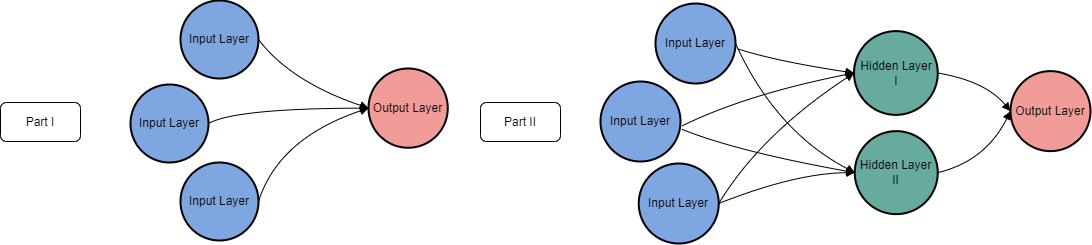

# **Part I - Simple Artifical Neural Network**

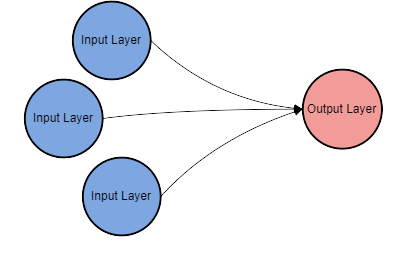

In [126]:
import numpy as np # for math
import pandas as pd # for data storage
import random # for weight and bias generation
import time # to record training time
import matplotlib.pyplot as plt # visuals

## Load and Scale Data

In [127]:
# independent variables (requires scaling)
age = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
fit = np.array([5, 9, 3, 7, 5, 2, 6, 4, 2, 10])
diet = np.array([5, 9, 8, 8, 6, 1, 10, 1, 5, 7])

# min-max scaling for independent features
x1 = (age - 0) / (101 - 0)
x2 = (fit - 0) / (11 - 0)
x3 = (diet - 0) / (11 - 0)

In [128]:
# dependent variable (does not need to be scaled)
y = np.array([9, 10, 7, 7, 5, 1, 4, 2, 2, 1])

## Initiate Neural Network Parameters
### (1) Weights and Bias

Z.png

In [129]:
# generate a random number uniformly between lower and upper bound
lower_bound = .1
upper_bound = .9

# initiate random weights
w1 = random.uniform(lower_bound, upper_bound)
w2 = random.uniform(lower_bound, upper_bound)
w3 = random.uniform(lower_bound, upper_bound)

# initiate bias - can be set to zero (unlike weights)
b = 0

# learning rate
lr = 0.005

# epochs
iterations = 25000

### (2) Activation Function and its Derivitive
### Activation Functions Neural Networks: A Quick & Complete Guide [link text](https://www.analyticsvidhya.com/blog/2021/04/activation-functions-and-their-derivatives-a-quick-complete-guide/)

identity.png

In [130]:
# Activation function : identity function
def activ_func(x):
    return x # identity

# Derivative of the identity activation function wrt sum of inputs and weights equation (L)
def d_activ_func(x):
    return 1

### (3) Forward propagation

y_hat.png

###(4) Loss Function and its Derivitive
### Mean Squared Error loss function and its gradient (derivative) for a batch of inputs [link text](https://www.bragitoff.com/2021/12/mean-squared-error-loss-function-and-its-gradient-derivative-for-a-batch-of-inputs-python-code/#google_vignette)

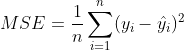

In [131]:
# n = number of samples (also equal to the length of the input vectors)
n = len(age)

In [132]:
# Mean Suared Error (MSE)
def MSE(predictions, targets):
    return ((1/n)*np.sum(((predictions-targets)**2)))
    # ALT METHOD: divide by 2 to make the derivitive simpler. return ((1/2n)*np.sum((predictions-targets)**2))
    # ALT METHOD: derivitive would be...       ((1/n)*(predictions - targets))

# Derivitve of Mean Suared Error wrt to the activation equation (Y_pred)
def d_MSE(predictions, targets):
    return ((1/n)*2*(predictions - targets))

### (5) Backward Propagation
### Gradient Equation [link text](https://sebastianraschka.com/faq/docs/mse-derivative.html)

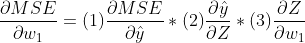

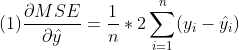

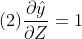

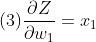

In [133]:
def single_parameter_back_propagation(predictions, targets, Z, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  alpha = d_MSE(predictions, targets)

  # (2)
  beta = d_activ_func(Z)

  # (3)
  if parameter == 'w1':
    theta = x1
  elif parameter == 'w2':
    theta = x2
  elif parameter == 'w3':
    theta = x3
  # bias is 1 (not = bias) because it is not multiplied by an input variable
  elif parameter == 'b':
    theta = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient = alpha * beta * theta

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

## Train Neural Network

In [134]:
def single_layer_model(x1, x2, x3, w1, w2, w3, b):
    Z = w1*x1 + w2*x2 + w3*x3 + b
    Y_pred = activ_func(Z)
    return Y_pred, Z

In [135]:
start_time = time.time()
data_storage = pd.DataFrame(columns=['Z', 'y_pred', 'RMSE', 'w1_gradient', 'w2_gradient', 'w3_gradient', 'b_gradient', 'w1', 'w2', 'w3', 'b'])
for i in range(iterations):

    # Forward propagation
    Y_pred, Z = single_layer_model(x1, x2, x3, w1, w2, w3, b)

    # calculate prediction error
    loss = MSE(Y_pred, y)
    RMSE = np.sqrt(loss)

    # Backward propagation
    # calculate the gradient for each parameter
    w1_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w1')
    w2_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w2')
    w3_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'w3')
    b_gradient = single_parameter_back_propagation(Y_pred, y, Z, 'b')

    # update weights and bias
    # the gradient vector points in the direction that will reduce error the most.
    # this value is negitive so you must subtract the gradient from the weight so the negitives cancel.
    w1 -= lr * w1_gradient
    w2 -= lr * w2_gradient
    w3 -= lr * w3_gradient
    b -= lr * b_gradient

    # store values in df
    data_storage.loc[i] = [Z, Y_pred, RMSE, w1_gradient, w2_gradient, w3_gradient, b_gradient, w1, w2, w3, b]
end_time = time.time()
print('Training Time: ', round(end_time - start_time, 4), 'Seconds')


Training Time:  69.9778 Seconds


## Performance Evaluation

In [136]:
data_storage.head(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,b_gradient,w1,w2,w3,b
0,"[0.14256181289541375, 0.2606957334246216, 0.19...","[0.14256181289541375, 0.2606957334246216, 0.19...",5.553017,-0.328437,-0.478953,-0.583468,-0.910043,0.207908,0.145466,0.128553,0.004550
1,"[0.14968921375468552, 0.26991740209712767, 0.1...","[0.14968921375468552, 0.26991740209712767, 0.1...",5.546240,-0.327531,-0.478116,-0.582523,-0.908405,0.209546,0.147857,0.131466,0.009092
2,"[0.15680392565179632, 0.2791226926218478, 0.20...","[0.15680392565179632, 0.2791226926218478, 0.20...",5.539479,-0.326627,-0.477281,-0.581579,-0.906770,0.211179,0.150243,0.134373,0.013626


In [137]:
data_storage.tail(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,b_gradient,w1,w2,w3,b
24997,"[7.4549391423094775, 8.950491050025303, 6.8164...","[7.4549391423094775, 8.950491050025303, 6.8164...",1.043741,0.023327,0.004001,0.002486,-0.016568,-7.101699,1.938739,4.107595,5.409800
24998,"[7.454995688368515, 8.950524252824792, 6.81647...","[7.454995688368515, 8.950524252824792, 6.81647...",1.043721,0.023325,0.004001,0.002487,-0.016567,-7.101816,1.938719,4.107583,5.409883
24999,"[7.455052231195928, 8.950557452280574, 6.81650...","[7.455052231195928, 8.950557452280574, 6.81650...",1.043701,0.023324,0.004001,0.002487,-0.016566,-7.101932,1.938699,4.107571,5.409966


In [138]:
# compare the most recent guess with the actual
print('Prediction: ', data_storage.iloc[-1]['y_pred'])
print('Actual: ',y)
print('How far away is my prediction on average? RMSE: ',round((np.sqrt(MSE(data_storage.iloc[-1]['y_pred'], y))), 1))

Prediction:  [7.45505223 8.95055745 6.81650761 6.81834628 5.01586855 1.91689372
 5.27948213 0.86308794 1.30111003 2.75477073]
Actual:  [ 9 10  7  7  5  1  4  2  2  1]
How far away is my prediction on average? RMSE:  1.0


## Predict Custom Health Scores

In [139]:
# pull the trained weights and bias values from the last row of the dataframe
fw1 = data_storage.iloc[-1]['w1']
fw2 = data_storage.iloc[-1]['w2']
fw3 = data_storage.iloc[-1]['w3']
fb = data_storage.iloc[-1]['b']

In [140]:
def final_model(x1, x2, x3):
    x1 = (x1 - 0) / (101 - 0)
    x2 = (x2 - 0) / (11 - 0)
    x3 = (x3 - 0) / (11 - 0)
    Z = fw1*x1 + fw2*x2 + fw3*x3 + fb
    Y_pred = activ_func(Z)

    Y_pred = round(Y_pred, 3)

    return Y_pred

In [141]:
# predict health values based on theee custom metrics
age = 20
health = 1
diet = 5
health = final_model(age, health, diet)
print(health)

6.047


## Convergence Visuals
### template code for visuals [link text](https://medium.com/@soudanik/building-a-deep-learning-model-by-hand-bd51feccdfc7)

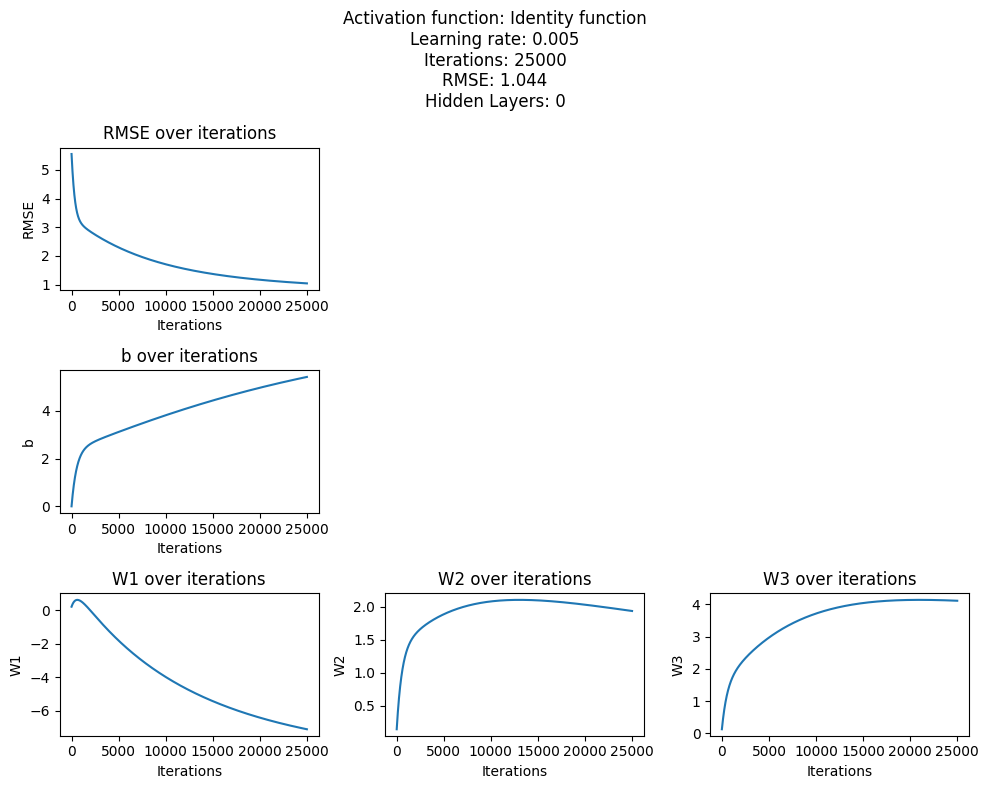

In [179]:
# plot template
fig, axs = plt.subplots(3, 3, figsize=(10, 8))  # Create 5 subplots on one line

# plot RMSE
axs[0, 0].plot(range(iterations), data_storage['RMSE'])
axs[0, 0].set_title('RMSE over iterations')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('RMSE')

# plot w1
axs[2, 0].plot(range(iterations), data_storage['w1'])
axs[2, 0].set_title('W1 over iterations')
axs[2, 0].set_xlabel('Iterations')
axs[2, 0].set_ylabel('W1')

# plot w2
axs[2, 1].plot(range(iterations), data_storage['w2'])
axs[2, 1].set_title('W2 over iterations')
axs[2, 1].set_xlabel('Iterations')
axs[2, 1].set_ylabel('W2')

# plot w2
axs[2, 2].plot(range(iterations), data_storage['w3'])
axs[2, 2].set_title('W3 over iterations')
axs[2, 2].set_xlabel('Iterations')
axs[2, 2].set_ylabel('W3')

# plot b
axs[1, 0].plot(range(iterations), data_storage['b'])
axs[1, 0].set_title('b over iterations')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('b')

# Set a common title for all subplots
fig.suptitle(f"Activation function: Identity function\nLearning rate: {lr}\nIterations: {iterations}\nRMSE: {round(data_storage.iloc[-1]['RMSE'], 3)}\nHidden Layers: 0")
plt.tight_layout()  # Adjust the padding between and around the subplot
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])

filename = f"model1.png"
plt.savefig(filename)

plt.show()

# **Part II - MLP - add Hidden Layer**

## Multilayer Perceptron (MLP) with Three Input Variables and Two Neurons in a Hidden Layer

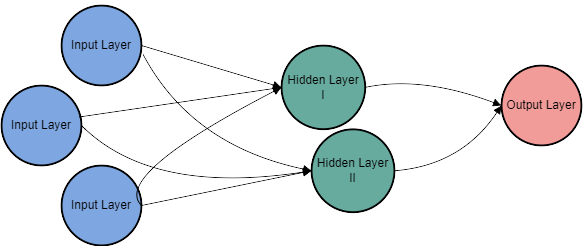

## Initiate Neural Network Parameters

### (1) Weights and Bias

h1.png

h2.png

Z_model 2.png

In [143]:
# generate a random number uniformly between lower and upper bound
lower_bound = .1
upper_bound = .9

# initiate random weights
w1 = random.uniform(lower_bound, upper_bound)
w2 = random.uniform(lower_bound, upper_bound)
w3 = random.uniform(lower_bound, upper_bound)
w4 = random.uniform(lower_bound, upper_bound)
w5 = random.uniform(lower_bound, upper_bound)
w6 = random.uniform(lower_bound, upper_bound)
w7 = random.uniform(lower_bound, upper_bound)
w8 = random.uniform(lower_bound, upper_bound)

# initiate bias - can be set to zero (unlike weights)
b1 = 0
b2 = 0
b3 = 0

# initiate hidden neuron values to store for backward propagation
h1 = 0
h2 = 0

# learning rate - Same as Part I
# epochs - Same as part I

### (2) Activation Function and its Derivitive - Same as Part I

### (3) Forward propagation - Same as Part I

### (4) Loss Function and its Derivitive - Same as Part I

### (5) Backward Propagation
#### Gradient Equation [link text](https://sebastianraschka.com/faq/docs/mse-derivative.html)

#### For weights 7 & 8

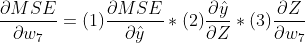

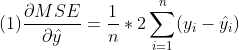

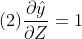

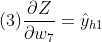

In [144]:
def back_propagation_layer_2(predictions, targets, Z, h1, h2, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  one = d_MSE(predictions, targets)

  # (2)
  two = d_activ_func(Z)

  # (3)
  if parameter == 'w7':
    three = h1
  elif parameter == 'w8':
    three = h2
  # bias is 1 (not = bias) because it is not multiplied by an input variable
  elif parameter == 'b3':
    three  = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient =  one * two * three

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

#### For Weights 1 - 6

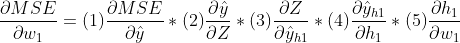

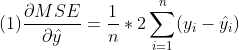

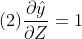

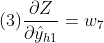

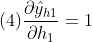

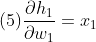

In [145]:
def back_propagation_layer_1(predictions, targets, Z, parameter):
  # calculate the gradient for each parameter by multipling each partial derivitve (chain rule)

  # (1)
  one = d_MSE(predictions, targets)

  # (2)
  two = d_activ_func(Z)

  # (3)
  if parameter == 'w1':
    three = w7
  elif parameter == 'w2':
    three = w7
  elif parameter == 'w3':
    three = w7
  elif parameter == 'w4':
    three = w8
  elif parameter == 'w5':
    three = w8
  elif parameter == 'w6':
    three = w8
  elif parameter == 'b1':
    three = 1
  elif parameter == 'b2':
    three = 1
  else:
    print('invalid parameter')

  # (4)
  four = 1

  # (5)
  if parameter == 'w1':
    five = x1
  elif parameter == 'w2':
    five = x2
  elif parameter == 'w3':
    five = x3
  elif parameter == 'w4':
    five = x1
  elif parameter == 'w5':
    five = x2
  elif parameter == 'w6':
    five = x3
  elif parameter == 'b1':
    five = 1
  elif parameter == 'b2':
    five = 1
  else:
    print('invalid parameter')

  # calculate gradient
  # returns a vector of gradients the size of input vector
  # gradient sizes may be able to distinguish feature importance (or at least find the feature that has the potential to improve the model the most)
  gradient = one * two * three * four * five

  # divide by n again to get the average loss per sample
  # returns the mean gradient for the vector of gradients
  avg_gradient = np.mean(gradient)

  return avg_gradient

## Train Neural Network

In [146]:
def hidden_layer_model(x1, x2, x3, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3):

    h1 = w1*x1 + w2*x2 + w3*x3 + b1
    h2 = w4*x1 + w5*x2 + w6*x3 + b2
    Z = w7*h1 + w8*h2 + b3
    Y_pred = activ_func(Z)
    return Y_pred, Z, h1, h2

In [147]:
start_time = time.time()
data_storage2 = pd.DataFrame(columns=['Z', 'y_pred', 'RMSE', 'w1_gradient', 'w2_gradient', 'w3_gradient', 'w4_gradient', 'w5_gradient', 'w6_gradient','w7_gradient', 'w8_gradient', 'b1_gradient','b2_gradient','b3_gradient', 'w1', 'w2', 'w3','w4', 'w5', 'w6','w7', 'w8', 'b1', 'b2', 'b3'])
for i in range(iterations):

    # Forward propagation
    Y_pred, Z, h1, h2 = hidden_layer_model(x1, x2, x3, w1, w2, w3, w4, w5, w6, w7, w8, b1, b2, b3)

    # calculate prediction error
    loss = MSE(Y_pred, y)
    RMSE = np.sqrt(loss)

    # Backward propagation
    # calculate the gradient for each parameter
    w1_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w1')
    w2_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w2')
    w3_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w3')
    w4_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w4')
    w5_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w5')
    w6_gradient = back_propagation_layer_1(Y_pred, y, Z, 'w6')
    w7_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'w7')
    w8_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'w8')

    b1_gradient = back_propagation_layer_1(Y_pred, y, Z, 'b1')
    b2_gradient = back_propagation_layer_1(Y_pred, y, Z, 'b2')
    b3_gradient = back_propagation_layer_2(Y_pred, y, Z, h1, h2, 'b3')

    # update weights and bias
    # the gradient vector points in the direction that will reduce error the most.
    # this value is negitive so you must subtract the gradient from the weight so the negitives cancel.
    w1 -= lr * w1_gradient
    w2 -= lr * w2_gradient
    w3 -= lr * w3_gradient
    w4 -= lr * w4_gradient
    w5 -= lr * w5_gradient
    w6 -= lr * w6_gradient
    w7 -= lr * w7_gradient
    w8 -= lr * w8_gradient

    b1 -= lr * b1_gradient
    b2 -= lr * b2_gradient
    b3 -= lr * b3_gradient

    # store values in df
    data_storage2.loc[i] = [Z, Y_pred, RMSE, w1_gradient, w2_gradient, w3_gradient, w4_gradient, w5_gradient, w6_gradient, w7_gradient, w8_gradient, b1_gradient,b2_gradient, b3_gradient, w1, w2, w3,w4, w5, w6,w7, w8, b1, b2, b3]
end_time = time.time()
print('Training Time: ', round(end_time - start_time, 4), 'Seconds')


Training Time:  108.7115 Seconds


## Performance Evaluation

In [148]:
data_storage2.head(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,w4_gradient,w5_gradient,w6_gradient,w7_gradient,...,w2,w3,w4,w5,w6,w7,w8,b1,b2,b3
0,"[0.5580105488077596, 1.0149394646817675, 0.760...","[0.5580105488077596, 1.0149394646817675, 0.760...",5.058969,-0.054601,-0.087174,-0.107335,-0.180241,-0.287768,-0.354319,-0.737194,...,0.495729,0.850618,0.642945,0.501404,0.687168,0.215140,0.701625,0.003933,0.003933,0.003933
1,"[0.5713022268260092, 1.0329216009534115, 0.775...","[0.5713022268260092, 1.0329216009534115, 0.775...",5.046565,-0.055168,-0.088339,-0.108804,-0.179915,-0.288096,-0.354837,-0.737692,...,0.496171,0.851162,0.643844,0.502845,0.688942,0.218829,0.705231,0.007850,0.007850,0.007850
2,"[0.5846439623902563, 1.0509728921452368, 0.790...","[0.5846439623902563, 1.0509728921452368, 0.790...",5.034137,-0.055721,-0.089492,-0.110260,-0.179574,-0.288411,-0.355341,-0.738142,...,0.496618,0.851714,0.644742,0.504287,0.690719,0.222519,0.708846,0.011751,0.011751,0.011751


In [149]:
data_storage2.tail(3)

,Z,y_pred,RMSE,w1_gradient,w2_gradient,w3_gradient,w4_gradient,w5_gradient,w6_gradient,w7_gradient,...,w2,w3,w4,w5,w6,w7,w8,b1,b2,b3
24997,"[8.699454875613885, 9.377537172864962, 7.30800...","[8.699454875613885, 9.377537172864962, 7.30800...",0.782642,0.000008,-0.000037,0.000047,0.00001,-0.000048,0.00006,-0.00001,...,0.302244,0.612291,-2.112416,0.343308,0.533877,2.167476,2.791825,1.278428,1.278428,1.278428
24998,"[8.699455179514002, 9.377537370940061, 7.30800...","[8.699455179514002, 9.377537370940061, 7.30800...",0.782642,0.000008,-0.000037,0.000046,0.00001,-0.000048,0.00006,-0.00001,...,0.302244,0.612291,-2.112416,0.343308,0.533877,2.167476,2.791825,1.278428,1.278428,1.278428
24999,"[8.699455483317683, 9.377537568958228, 7.30800...","[8.699455483317683, 9.377537568958228, 7.30800...",0.782642,0.000008,-0.000037,0.000046,0.00001,-0.000048,0.00006,-0.00001,...,0.302244,0.612291,-2.112416,0.343309,0.533877,2.167476,2.791825,1.278428,1.278428,1.278428


In [150]:
# compare the most recent guess with the actual
print('Prediction: ', data_storage2.iloc[-1]['y_pred'])
print('Actual: ',y)
print('How far away is my prediction on average? RMSE: ',round((np.sqrt(MSE(data_storage2.iloc[-1]['y_pred'], y))), 3))

Prediction:  [8.69945548 9.37753757 7.30800825 6.96150207 5.22257611 2.56852135
 4.52733877 0.99538335 0.79333979 1.54587817]
Actual:  [ 9 10  7  7  5  1  4  2  2  1]
How far away is my prediction on average? RMSE:  0.783


# **Part III - Compare Models**

## RMSE: Model 1 vs Model 2

In [180]:
print('Model 1: ', round(data_storage.iloc[-1]['RMSE'], 3), ' Model 2: ', round(data_storage2.iloc[-1]['RMSE'], 3))

Model 1:  1.044  Model 2:  0.783


## Predict Custom Health Scores

In [151]:
# pull the trained weights and bias values from the last row of the dataframe
fw1 = data_storage2.iloc[-1]['w1']
fw2 = data_storage2.iloc[-1]['w2']
fw3 = data_storage2.iloc[-1]['w3']
fw4 = data_storage2.iloc[-1]['w4']
fw5 = data_storage2.iloc[-1]['w5']
fw6 = data_storage2.iloc[-1]['w6']
fw7 = data_storage2.iloc[-1]['w7']
fw8 = data_storage2.iloc[-1]['w8']
fb1 = data_storage2.iloc[-1]['b1']
fb2 = data_storage2.iloc[-1]['b2']
fb3 = data_storage2.iloc[-1]['b3']

In [167]:
def final_model_v2(x1, x2, x3):

    x1 = (x1 - 0) / (101 - 0)
    x2 = (x2 - 0) / (11 - 0)
    x3 = (x3 - 0) / (11 - 0)

    h1 = (fw1*x1) + (fw2*x2) + (fw3*x3) + fb1
    h2 = (fw4*x1) + (fw5*x2) + (fw6*x3) + fb2
    Z = (fw7*h1) + (fw8*h2 + fb3)
    Y_pred = activ_func(Z)

    Y_pred = round(Y_pred, 3)

    return Y_pred

In [186]:
# predict health values based on theee custom metrics
age = 50
health = 3
diet = 3
health = final_model(age, health, diet)
healthv2 = final_model_v2(age, health, diet)
print(health, healthv2, (healthv2 - health))

4.854 4.433 -0.42100000000000026


## Convergence Visuals
### template code for visuals [link text](https://medium.com/@soudanik/building-a-deep-learning-model-by-hand-bd51feccdfc7)

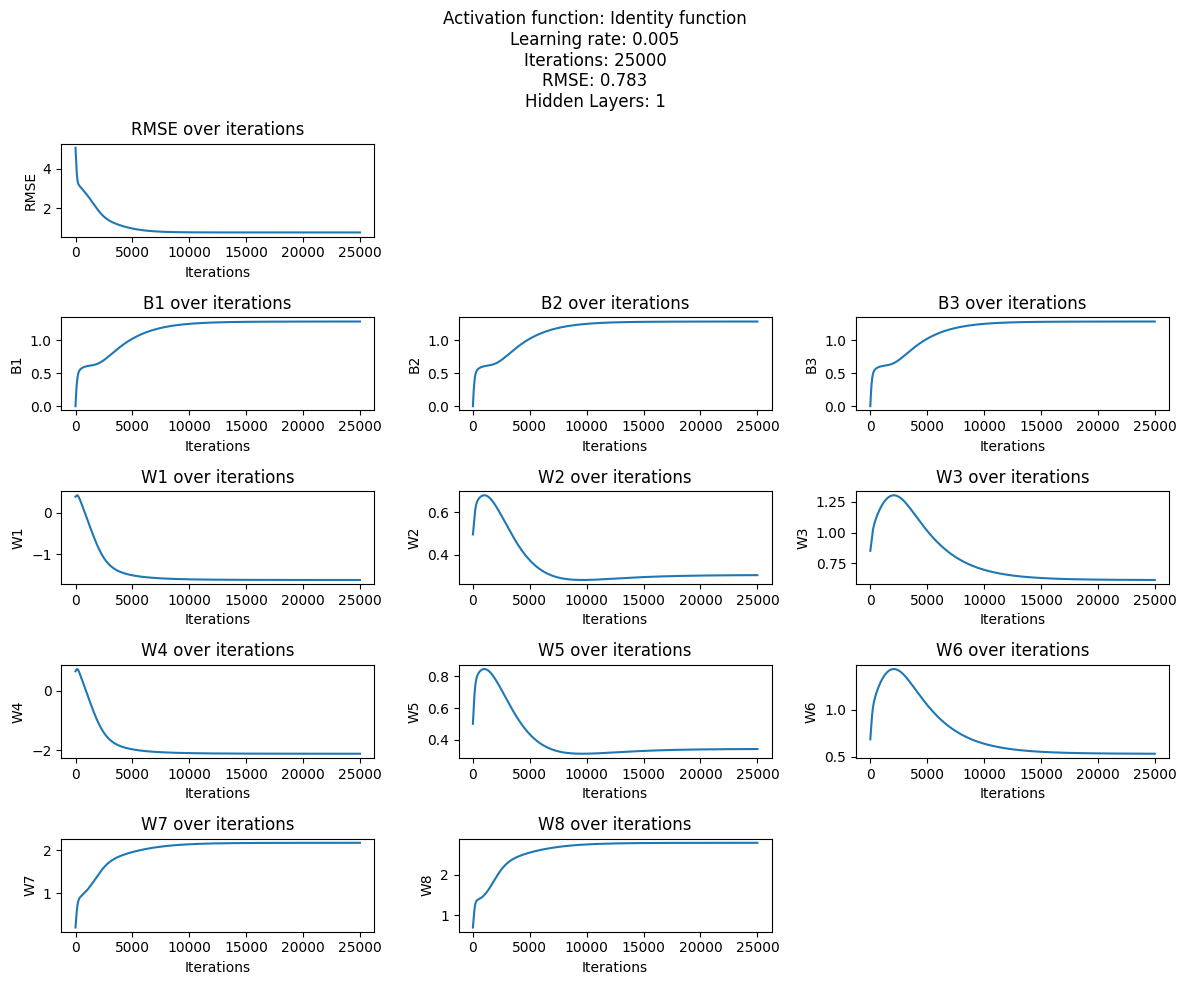

In [178]:
# plot template
fig, axs = plt.subplots(5, 3, figsize=(12,10))  # Create 5 subplots on one line

# plot RMSE
axs[0, 0].plot(range(iterations), data_storage2['RMSE'])
axs[0, 0].set_title('RMSE over iterations')
axs[0, 0].set_xlabel('Iterations')
axs[0, 0].set_ylabel('RMSE')

# plot w1
axs[2, 0].plot(range(iterations), data_storage2['w1'])
axs[2, 0].set_title('W1 over iterations')
axs[2, 0].set_xlabel('Iterations')
axs[2, 0].set_ylabel('W1')

# plot w2
axs[2, 1].plot(range(iterations), data_storage2['w2'])
axs[2, 1].set_title('W2 over iterations')
axs[2, 1].set_xlabel('Iterations')
axs[2, 1].set_ylabel('W2')

# plot w2
axs[2, 2].plot(range(iterations), data_storage2['w3'])
axs[2, 2].set_title('W3 over iterations')
axs[2, 2].set_xlabel('Iterations')
axs[2, 2].set_ylabel('W3')

# plot w4
axs[3, 0].plot(range(iterations), data_storage2['w4'])
axs[3, 0].set_title('W4 over iterations')
axs[3, 0].set_xlabel('Iterations')
axs[3, 0].set_ylabel('W4')

# plot w5
axs[3, 1].plot(range(iterations), data_storage2['w5'])
axs[3, 1].set_title('W5 over iterations')
axs[3, 1].set_xlabel('Iterations')
axs[3, 1].set_ylabel('W5')

# plot w6
axs[3, 2].plot(range(iterations), data_storage2['w6'])
axs[3, 2].set_title('W6 over iterations')
axs[3, 2].set_xlabel('Iterations')
axs[3, 2].set_ylabel('W6')

# plot w7
axs[4, 0].plot(range(iterations), data_storage2['w7'])
axs[4, 0].set_title('W7 over iterations')
axs[4, 0].set_xlabel('Iterations')
axs[4, 0].set_ylabel('W7')

# plot w8
axs[4, 1].plot(range(iterations), data_storage2['w8'])
axs[4, 1].set_title('W8 over iterations')
axs[4, 1].set_xlabel('Iterations')
axs[4, 1].set_ylabel('W8')

# plot b1
axs[1, 0].plot(range(iterations), data_storage2['b1'])
axs[1, 0].set_title('B1 over iterations')
axs[1, 0].set_xlabel('Iterations')
axs[1, 0].set_ylabel('B1')

# plot b2
axs[1, 1].plot(range(iterations), data_storage2['b2'])
axs[1, 1].set_title('B2 over iterations')
axs[1, 1].set_xlabel('Iterations')
axs[1, 1].set_ylabel('B2')

# plot b3
axs[1, 2].plot(range(iterations), data_storage2['b3'])
axs[1, 2].set_title('B3 over iterations')
axs[1, 2].set_xlabel('Iterations')
axs[1, 2].set_ylabel('B3')

# Set a common title for all subplots
fig.suptitle(f"Activation function: Identity function\nLearning rate: {lr}\nIterations: {iterations}\nRMSE: {round(data_storage2.iloc[-1]['RMSE'], 3)}\nHidden Layers: 1")
plt.tight_layout()  # Adjust the padding between and around the subplots

fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[4, 2])

filename = f"model2.png"
plt.savefig(filename)

plt.show()

# Other Activation Functions

## Sigmoid

In [157]:
# sigmoid activation function (non-linear)
def sigmoid_activ_func(x):
    for i in range(len(x)):
      x[i] = 1 / (1 + np.exp(-x[i]))
    return x

# derivative of sigmoid activation function
def d_sigmoid_activ_func(x):
    x = sigmoid_activ_func(x)
    x = x * (1 - x)
    return x

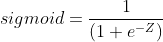

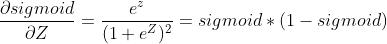

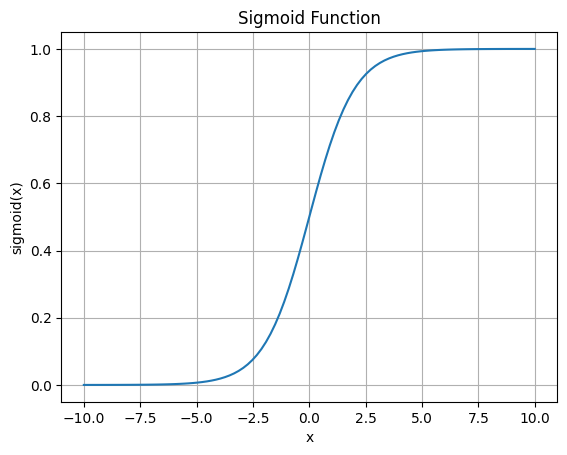

In [158]:
# simple igmoid function for visual
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# generate data for visual
x_sig = np.linspace(-10, 10, 100)
y_sig = sigmoid(x_sig)

# plot
plt.plot(x_sig, y_sig)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()

## derivitive  math [link text](https://mathworld.wolfram.com/SigmoidFunction.html)

## ReLu

In [159]:
# ReLu activation function (non-linear)
def relu_activ_func(x):
    for i in range(len(x)):
        x[i] = max(0, x[i]) # ReLu
    return x

# Derivative of ReLu activation function
def d_relu_activ_func(x):
    for i in range(len(x)):
        if x[i] > 0:
            x[i] = 1
        else:
            x[i] = 0
    return x

relu.png

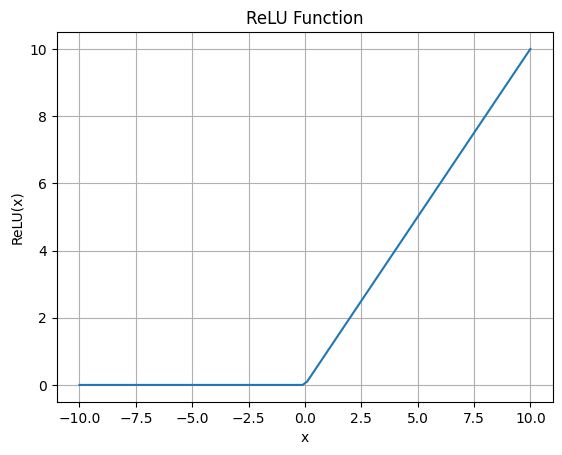

In [160]:
# simple relu function for visual
def relu(x):
    return np.maximum(0, x)

# generate data for visual
x = np.linspace(-10, 10, 100)
y = relu(x)

# plot
plt.plot(x, y)
plt.title('ReLU Function')
plt.xlabel('x')
plt.ylabel('ReLU(x)')
plt.grid(True)
plt.show()

# Other Scaling

## Standardization

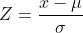

In [161]:
# Calculate mean and standard deviation
mean_x1 = np.mean(x1)
std_x1 = np.std(x1)

mean_x2 = np.mean(x2)
std_x2 = np.std(x2)

# Standardize the vectors
#x1 = (x1 - mean_x1) / std_x1
#x2 = (x2 - mean_x2) / std_x2